# Project Overview

El set de datos USArrests contiene el porcentaje de asaltos (Assault), asesinatos (Murder) y secuestros (Rape) por cada 100,000 habitantes para cada uno de los 50 estados de USA (1973). Además, también incluye el porcentaje de la población de cada estado que vive en zonas rurales (UrbanPoP). Empleando estas variables, se pretende calcular una matriz de distancias que permita identificar los estados más similares.

Dos de las librerías de python que implementan las distancias descritas en este documento (junto con otras) son sklearn.metrics.pairwise_distances y scipy.spatial.distance. En concreto, sklearn permite calcular las distancias: ‘cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan’, ‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘correlation’, ‘dice’, ‘hamming’, ‘jaccard’, ‘kulsinski’, ‘mahalanobis’, ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’ y ‘yule’.

# Libraries

In [11]:
# Tratamiento de datos
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import scale

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

# Get Data

In [12]:
USArrests = sm.datasets.get_rdataset("USArrests", "datasets")
datos = USArrests.data
datos.head(4)

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5


In [13]:
datos.shape

(50, 4)

# Escalado de variables

<img src="https://proyectodescartes.org/iCartesiLibri/materiales_didacticos/IntroduccionEstadisticaProbabilidad/4ESO/Estadistica/6_5PuntuacionesNormalizadas/img/FormulaTipificacion.png" alt="Fórmula tipificación" height="100px">

In [14]:
datos_scaled = scale(X=datos, axis=0, with_mean=True, with_std=True) 
    # axis=0: La normalización se realiza para cada columna independientemente (cada variable).
    # with_mean=True: Se resta la media de cada columna (centrado de los datos).
    # with_std=True: Se divide cada columna por su desviación estándar (escalado a varianza 1).
datos_scaled = pd.DataFrame(datos_scaled, columns=datos.columns, index=datos.index)
datos_scaled.head(4)

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794


In [15]:
datos_scaled.shape

(50, 4)

Es muy útil porque ayuda a que todos los datos estén en la misma escala, lo cual es importante para muchos algoritmos de machine learning (como regresión, clustering, SVM, etc.).

# Cálculo de distancias

In [16]:
print('------------------')
print('Distancia euclídea')
print('------------------')
distancias = pairwise_distances(
                X = datos_scaled,
                metric ='euclidean'
             )
# Sirve para calcular la distancia entre todos los pares de filas de la matriz que le pases.
distancias

------------------
Distancia euclídea
------------------


array([[0.        , 2.73120406, 2.3168048 , ..., 3.15606716, 3.54031498,
        1.84767279],
       [2.73120406, 0.        , 2.72806129, ..., 4.54614685, 4.92060893,
        3.5348729 ],
       [2.3168048 , 2.72806129, 0.        , ..., 4.54307921, 3.98261394,
        2.71963649],
       ...,
       [3.15606716, 4.54614685, 4.54307921, ..., 0.        , 2.05150768,
        1.90126867],
       [3.54031498, 4.92060893, 3.98261394, ..., 2.05150768, 0.        ,
        1.76234909],
       [1.84767279, 3.5348729 , 2.71963649, ..., 1.90126867, 1.76234909,
        0.        ]], shape=(50, 50))

In [17]:
# Se descarta la diagonal superior de la matriz
distancias[np.triu_indices(n=distancias.shape[0])] = np.nan

In [ ]:
# Lo llevamos a un dataframe
distancias = pd.DataFrame(
                distancias,
                columns=datos_scaled.index,
                index = datos_scaled.index
            )
distancias

rownames,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
rownames,,,,,,,,,,,,,,,,,,,,,
Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,2.731204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,2.316805,2.728061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arkansas,1.302905,2.854730,2.745350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
California,3.296239,3.043126,1.323789,3.801851,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Colorado,2.677982,2.350139,1.378889,2.859794,1.300691,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Connecticut,3.247941,4.788035,3.295984,2.634114,4.107674,3.361780,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delaware,2.039794,3.658129,1.928755,1.818602,3.104992,2.580683,1.774684,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Florida,2.321467,3.027189,1.767154,3.406433,2.045563,2.470692,4.515453,3.092498,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
distancias.iloc[:4,:4]

rownames,Alabama,Alaska,Arizona,Arkansas
rownames,,,,
Alabama,NaN,NaN,NaN,NaN
Alaska,2.731204,NaN,NaN,NaN
Arizona,2.316805,2.728061,NaN,NaN
Arkansas,1.302905,2.854730,2.74535,NaN


# Top n observaciones más similares

Se reestructura la matriz de distancias para poder ordenar los pares de observaciones por orden de distancia.

In [22]:
distancias.melt(ignore_index=False, var_name="estado_b", value_name='distancia') \
    .rename_axis("estado_a") \
    .reset_index() \
    .dropna() \
    .sort_values('distancia') \
    .head(3)


,estado_a,estado_b,distancia
728,New Hampshire,Iowa,0.207944
631,New York,Illinois,0.353774
665,Kansas,Indiana,0.433124


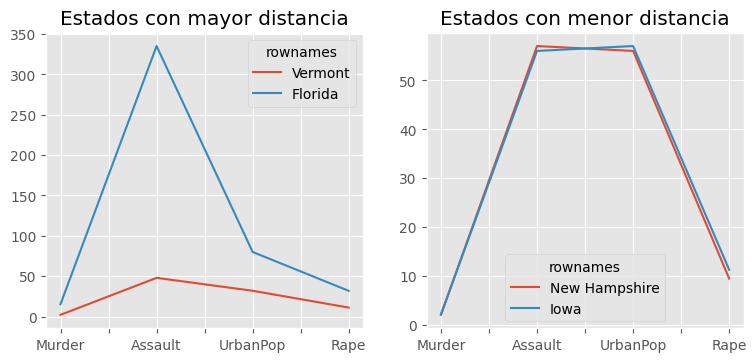

In [23]:
# Estados con mayor y menor distancia
# ==============================================================================
fig, axs = plt.subplots(1,2, figsize=(9, 3.84))
datos.loc[['Vermont', 'Florida']].transpose().plot(ax= axs[0])
axs[0].set_title('Estados con mayor distancia')
datos.loc[['New Hampshire', 'Iowa']].transpose().plot(ax= axs[1])
axs[1].set_title('Estados con menor distancia');